In [72]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
#load in R1, R2 and observed summary stats
filename = "./observed_stats.csv"
x_o = np.genfromtxt(filename, delimiter=',', dtype=float)
filename2 = "./summary_stats_r1.csv"
x = np.genfromtxt(filename2, delimiter=',', dtype=float)
filename3 = "./summary_stats_r2_old.csv"
x2 = np.genfromtxt(filename3, delimiter=',', dtype=float)

In [86]:
#scale data
x_scaler = StandardScaler()
x_o = x_o.reshape(1, -1)
combined_x = np.concatenate((x, x2, x_o))
combined_x_t = x_scaler.fit_transform(combined_x)

In [91]:
np.var(combined_x_t[:,])

0.9999999999999992

In [23]:
#carry out pca
pca = PCA(n_components=17)

principalComponents = pca.fit_transform(combined_x)

pca_df = pd.DataFrame(principalComponents, columns=['pc1', 'pc2', 'pc3', 'pc4','pc5', 'pc6','pc7', 'pc8','pc9', 'pc10', 'pc11', 'pc12','pc13', 'pc14','pc15', 'pc16','pc17'])

In [24]:
#add names for groups
hues = ["r1"]*9349 + ["r2"]*7690 + ["obs"]
pca_df["hues"] = hues

In [ ]:
#single plot
ax = sns.scatterplot(pca_df, x=pca_df["pc3"], y=pca_df["pc4"], hue=pca_df["hues"], palette = "bright")

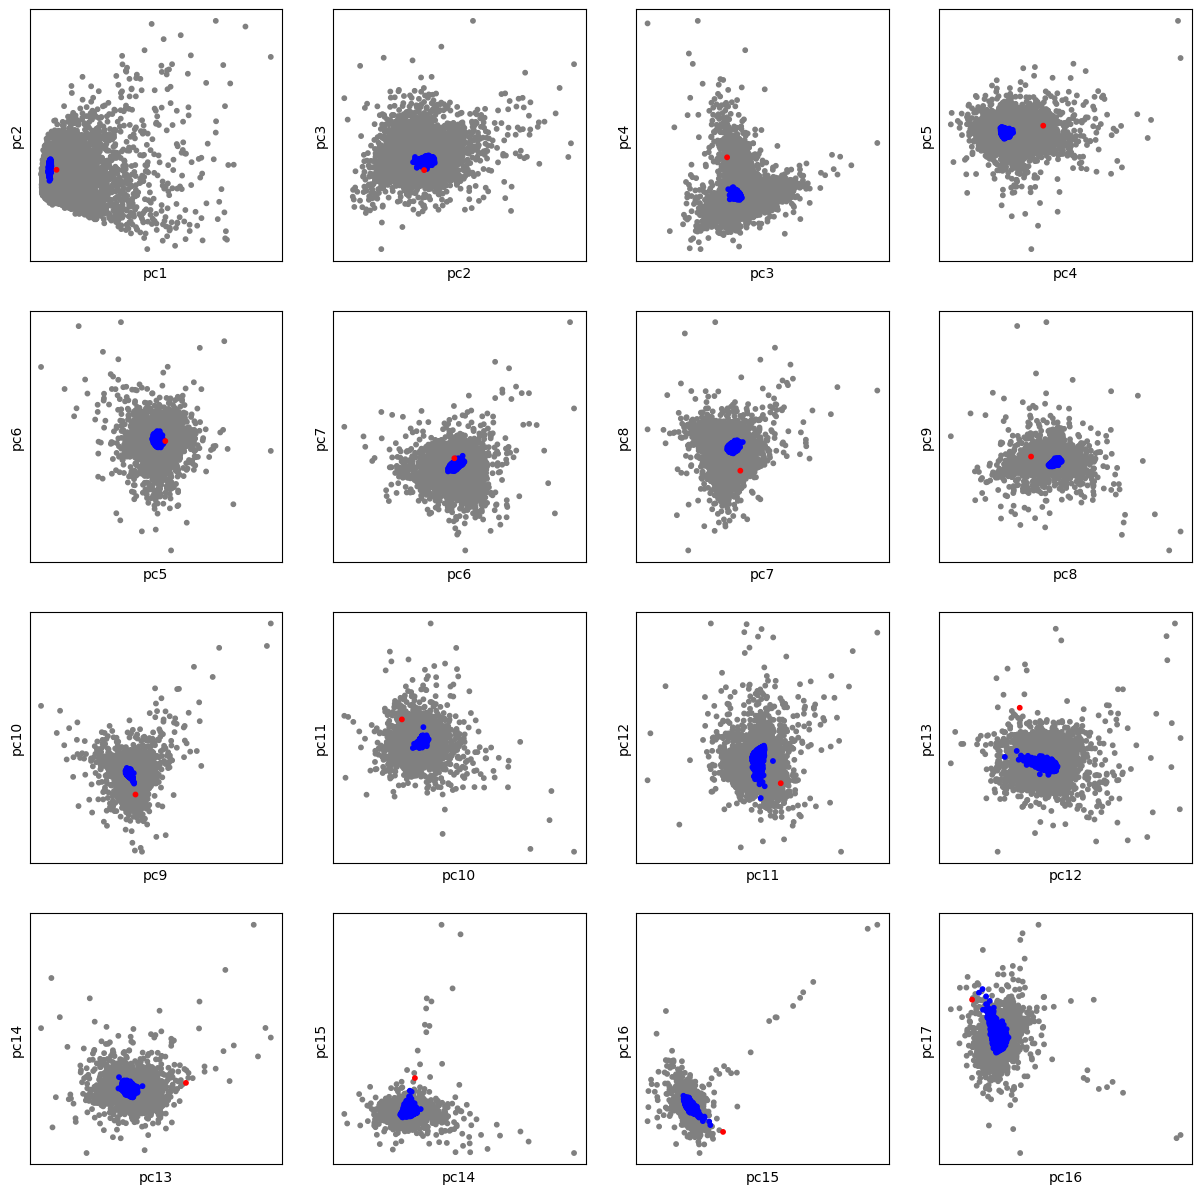

In [25]:
#4x4 plot for each pairwise 1-16
fig, axs = plt.subplots(4, 4, figsize=(15,15))
s=10
colours = {"obs":"red", "r1":"grey", "r2":"blue"}
axs[0, 0].scatter(pca_df["pc1"], pca_df["pc2"],s=s, c=pca_df["hues"].map(colours))
axs[0, 1].scatter(pca_df["pc2"], pca_df["pc3"],s=s, c=pca_df["hues"].map(colours))
axs[0, 2].scatter(pca_df["pc3"], pca_df["pc4"],s=s, c=pca_df["hues"].map(colours))
axs[0, 3].scatter(pca_df["pc4"], pca_df["pc5"],s=s, c=pca_df["hues"].map(colours))
axs[1, 0].scatter(pca_df["pc5"], pca_df["pc6"],s=s, c=pca_df["hues"].map(colours))
axs[1, 1].scatter(pca_df["pc6"], pca_df["pc7"],s=s, c=pca_df["hues"].map(colours))
axs[1, 2].scatter(pca_df["pc7"], pca_df["pc8"],s=s, c=pca_df["hues"].map(colours))
axs[1, 3].scatter(pca_df["pc8"], pca_df["pc9"],s=s, c=pca_df["hues"].map(colours))
axs[2, 0].scatter(pca_df["pc9"], pca_df["pc10"],s=s, c=pca_df["hues"].map(colours))
axs[2, 1].scatter(pca_df["pc10"], pca_df["pc11"],s=s, c=pca_df["hues"].map(colours))
axs[2, 2].scatter(pca_df["pc11"], pca_df["pc12"],s=s, c=pca_df["hues"].map(colours))
axs[2, 3].scatter(pca_df["pc12"], pca_df["pc13"],s=s, c=pca_df["hues"].map(colours))
axs[3, 0].scatter(pca_df["pc13"], pca_df["pc14"],s=s, c=pca_df["hues"].map(colours))
axs[3, 1].scatter(pca_df["pc14"], pca_df["pc15"],s=s, c=pca_df["hues"].map(colours))
axs[3, 2].scatter(pca_df["pc15"], pca_df["pc16"],s=s, c=pca_df["hues"].map(colours))
axs[3, 3].scatter(pca_df["pc16"], pca_df["pc17"],s=s, c=pca_df["hues"].map(colours))

labs = ['pc1', 'pc2', 'pc3', 'pc4','pc5', 'pc6','pc7', 'pc8','pc9', 'pc10', 'pc11', 'pc12','pc13', 'pc14','pc15', 'pc16','pc17']

plot = 0

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set(xlabel=labs[plot], ylabel=labs[plot+1])
    plot += 1

plt.savefig("eggplot_1", dpi='figure', format=None)


In [29]:
### loadings
names = np.genfromtxt("./statnames.csv", delimiter=',', dtype=str)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['pc1', 'pc2', 'pc3', 'pc4','pc5', 'pc6','pc7', 'pc8','pc9', 'pc10', 'pc11', 'pc12','pc13', 'pc14','pc15', 'pc16','pc17'],
                              index=names)
loading_matrix



,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17
﻿diversity_domestic,0.897319,-0.189968,-0.303355,0.031165,0.028731,-0.041200,-0.112067,-0.121980,-0.117044,0.001257,-0.032624,0.050441,-0.079255,-0.069939,0.028808,-0.018411,0.028130
diversity_scot,0.982776,-0.061242,-0.103766,-0.020854,-0.010105,0.021304,-0.005023,-0.048454,-0.028940,-0.030385,-0.025948,0.059155,-0.050391,0.004219,0.012120,-0.022602,-0.001389
diversity_captive,0.956467,-0.192097,-0.035557,-0.045955,0.063854,0.068112,0.070891,-0.006528,-0.081392,-0.026510,-0.051179,0.034299,0.022763,0.014070,-0.026062,-0.023384,-0.043420
diversity_eu,0.836188,-0.130364,-0.231214,-0.248568,0.133620,-0.010210,0.063087,0.006136,-0.005681,-0.075451,0.040735,0.114391,0.134173,0.030849,-0.001417,0.023674,-0.126934
diversity_lyb,0.894188,-0.200595,-0.279639,-0.033891,-0.001726,-0.031446,-0.136169,-0.130344,-0.102898,0.010460,-0.047133,0.047618,-0.054992,-0.065813,0.032303,-0.027272,0.047643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pc2_dist_scot_eu,0.446671,0.526570,-0.353383,-0.398376,0.095022,-0.130925,-0.051895,0.296685,0.009386,-0.057097,-0.061428,-0.193718,-0.007449,-0.061488,0.010208,0.028779,-0.034801
pc2_dist_scot_lyb,0.390671,0.075290,-0.363384,0.687011,0.163286,-0.050714,0.049246,0.040736,0.131321,-0.350311,0.068693,-0.103579,0.028482,0.097203,-0.004951,-0.007595,-0.044660
pc2_dist_captive_eu,0.620456,0.201262,-0.240234,-0.510885,0.118005,-0.219576,0.003043,0.240677,0.001015,-0.025494,0.035248,-0.251018,-0.023127,-0.050416,-0.053398,0.040124,-0.068689
pc2_dist_captive_lyb,0.653918,-0.167036,-0.295307,0.396211,0.200154,-0.168122,0.077276,0.043251,0.110979,-0.300395,0.158576,-0.191665,0.007143,0.092193,-0.068984,0.013162,-0.076807


In [53]:
#PC4
loading_matrix.sort_values(by=['pc4'], ascending=False).head().iloc[:,3:4]

,pc4
pc2_dist_domestic_lyb,0.870245
pc2_median_lyb,0.733344
pc2_dist_scot_lyb,0.687011
pc2_iqr_lyb,0.663503
pc2_dist_eu_lyb,0.427906


In [55]:
#PC8
loading_matrix.sort_values(by=['pc8'], ascending=False).head().iloc[:,7:8]

,pc8
pc2_median_domestic,0.445685
pc2_median_eu,0.422685
relatedness_domestic_scot,0.325565
relatedness_domestic_captive,0.320230
fst_captive_eu,0.297685


In [56]:
#PC10
loading_matrix.sort_values(by=['pc10'], ascending=False).head().iloc[:,9:10]

,pc10
pc1_dist_domestic_lyb,0.423094
f3_domestic_captive_lyb,0.377500
f3_domestic_eu_lyb,0.357234
f3_domestic_scot_lyb,0.330882
pc1_median_lyb,0.217953


In [57]:
#PC11
loading_matrix.sort_values(by=['pc11'], ascending=False).head().iloc[:,10:11]

,pc11
pc2_median_captive,0.414819
f3_captive_eu_lyb,0.220280
pc2_dist_scot_captive,0.209245
pc1_median_lyb,0.189565
pc1_median_domestic,0.184927


In [58]:
#PC13
loading_matrix.sort_values(by=['pc13'], ascending=False).head().iloc[:,12:13]

,pc13
pc2_iqr_eu,0.274565
relatedness_domestic_lyb,0.254722
pc2_dist_eu_lyb,0.237094
pc2_iqr_lyb,0.231269
tajimas_d_domestic,0.167134


In [59]:
#PC15
loading_matrix.sort_values(by=['pc15'], ascending=False).head().iloc[:,14:15]

,pc15
pc2_iqr_eu,0.677411
pc1_iqr_lyb,0.286886
pc2_median_scot,0.226512
pc1_iqr_domestic,0.211235
pc2_iqr_domestic,0.153205


In [60]:
#PC16
loading_matrix.sort_values(by=['pc16'], ascending=False).head().iloc[:,15:16]

,pc16
pc2_iqr_eu,0.476908
pc1_median_captive,0.302275
pc1_median_eu,0.183071
fst_scot_lyb,0.135423
fst_domestic_scot,0.130246


In [61]:
#PC17
loading_matrix.sort_values(by=['pc17'], ascending=False).head().iloc[:,16:17]

,pc17
pc1_iqr_lyb,0.343555
tajimas_d_domestic,0.173080
pc1_median_captive,0.166834
fst_captive_eu,0.156577
pc2_median_scot,0.153917
